In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [78]:
pdg_train = np.abs(np.load('trainpdg.npy'))
pdg_test = np.abs(np.load('testpdg.npy'))

# Training data sets

In [79]:
trainangles = np.load('trainangles.npy', allow_pickle = True)
trainenergy = np.load('trainenergies.npy', allow_pickle = True)
trainbinfrac = np.load('trainbinfrac.npy', allow_pickle = True)
trainrsq = np.load('trainrsquare.npy', allow_pickle = True)
trainisTrack = np.load('trainisTrack.npy')
traindedx = np.load('dedx_train.npy', allow_pickle = True)

In [80]:
len(trainangles)

117318

In [81]:
len(traindedx)

117318

In [82]:
x_train = np.array(list(zip(trainangles, trainbinfrac, trainenergy, trainrsq, traindedx)))

In [83]:
x_train

array([[1.43126162e+01, 2.02380952e-01, 1.81911126e-01, 9.93120234e-01,
        3.46223368e+02],
       [1.51185943e+00, 2.05128205e-01, 2.36471266e-01, 9.79858409e-01,
        6.37410446e+02],
       [5.77915535e+00, 2.05882353e-01, 2.86857754e-01, 9.97228315e-01,
        1.87292996e+03],
       ...,
       [2.36683276e+00, 2.20289855e-01, 2.10825384e-01, 9.99218920e-01,
        2.55594516e+03],
       [2.46280738e+00, 2.00361011e-01, 1.97115883e-01, 9.99439636e-01,
        2.39284177e+02],
       [3.43693059e+00, 2.14285714e-01, 1.91930220e-01, 9.98836453e-01,
        6.99412575e+02]])

In [84]:
y_train = trainisTrack

In [85]:
len(y_train)

117318

# Create and train BDT

In [86]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [87]:
bdt.score(x_train, y_train)

0.9508685794166283

# Testing data sets

In [88]:
testangles = np.load('testangles.npy', allow_pickle = True)
testenergy = np.load('testenergies - Copy.npy', allow_pickle = True)
testbinfrac = np.load('testbinfrac.npy', allow_pickle = True)
testrsq = np.load('testrsquare.npy', allow_pickle = True)
testisTrack = np.load('testisTrack.npy')
testdedx = np.load('dedx_test.npy', allow_pickle = True)

In [89]:
len(testdedx)

118398

In [90]:
x_test = np.array(list(zip(testangles, testbinfrac, testenergy, testrsq, testdedx)))

In [91]:
y_test = testisTrack

# Create and test BDT

In [92]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [93]:
bdt.score(x_test, y_test)

0.949686650112333

# BDT training score

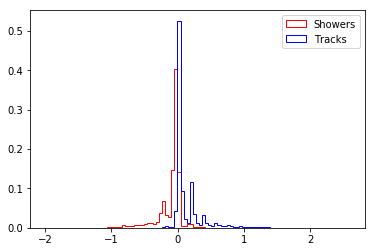

In [94]:
f_train = bdt.decision_function(x_train)
min_f_train = np.round(np.min(f_train), 1)
max_f_train = np.round(np.max(f_train), 1)
bins_train = np.linspace(min_f_train, max_f_train, 100)
cls_0_f_train = f_train[np.where(y_train == 0)]
cls_1_f_train = f_train[np.where(y_train == 1)]
weights_0 = np.ones_like(cls_0_f_train) / len(cls_0_f_train)
weights_1 = np.ones_like(cls_1_f_train) / len(cls_1_f_train)
plt.hist(cls_0_f_train, color='r', weights=weights_0, bins=bins_train, histtype='step', label='Showers')
plt.hist(cls_1_f_train, color='b', weights=weights_1, bins=bins_train, histtype='step', label='Tracks')
plt.legend()

# BDT testing score

In [95]:
#Which one do we talk about training or testing?

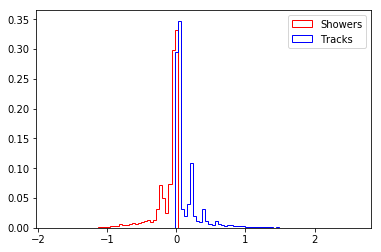

In [96]:
f_test = bdt.decision_function(x_test)
min_f_test = np.round(np.min(f_test), 1)
max_f_test = np.round(np.max(f_test), 1)
bins_test = np.linspace(min_f_test, max_f_test, 100)
cls_0_f_test = f_test[np.where(y_test == 0)]
cls_1_f_test = f_test[np.where(y_test == 1)]
weights_0 = np.ones_like(cls_0_f_test) / len(cls_0_f_test)
weights_1 = np.ones_like(cls_1_f_test) / len(cls_1_f_test)
plt.hist(cls_0_f_test, color='r', weights=weights_0, bins=bins_test, histtype='step', label='Showers')
plt.hist(cls_1_f_test, color='b', weights=weights_1, bins=bins_test, histtype='step', label='Tracks')
plt.legend()

In [97]:
tracks_train = np.where(f_train > 0)[0]
tracks_test = np.where(f_test > 0)[0] 

In [98]:
len(tracks_train)

78513

# Track particle id training sample

In [99]:
pdg_muon_train = pdg_train[tracks_train]
pdg_pion_train = pdg_train[tracks_train]
pdg_proton_train = pdg_train[tracks_train]

In [100]:
for n, i in enumerate(pdg_muon_train):
    if i != 13:
        pdg_muon_train[n] = 0

In [101]:
set(pdg_muon_train)

{0, 13}

In [102]:
for n, i in enumerate(pdg_pion_train):
    if i != 211:
        pdg_pion_train[n] = 0

In [103]:
for n, i in enumerate(pdg_proton_train):
    if i != 2212:
        pdg_proton_train[n] = 0

In [104]:
np.save('pdg_muon_train.npy', pdg_muon_train)
np.save('pdg_pion_train.npy', pdg_pion_train)
np.save('pdg_proton_train.npy', pdg_proton_train)

In [105]:
trainangles_tracks = trainangles[tracks_train]
trainenergy_tracks = trainenergy[tracks_train]
trainbinfrac_tracks= trainbinfrac[tracks_train]
trainrsq_tracks = trainrsq[tracks_train]
traindedx_tracks = traindedx[tracks_train]

In [106]:
testangles_tracks = testangles[tracks_test]
testenergy_tracks = testenergy[tracks_test]
testbinfrac_tracks = testbinfrac[tracks_test]
testrsq_tracks = testrsq[tracks_test]
testdedx_tracks = testdedx[tracks_test]

In [107]:
#Variables values with bdt score > 0
np.save('trainangles_t.npy', trainangles_tracks)
np.save('trainenergy_t.npy', trainenergy_tracks)
np.save('trainbinfrac_t.npy', trainbinfrac_tracks)
np.save('trainrsq_t.npy', trainrsq_tracks)
np.save('traindedx_t.npy', traindedx_tracks)

In [108]:
np.save('testangles_t.npy', testangles_tracks)
np.save('testenergy_t.npy', testenergy_tracks)
np.save('testbinfrac_t.npy', testbinfrac_tracks)
np.save('testrsq_t.npy', testrsq_tracks)
np.save('testdedx_t.npy', testdedx_tracks)

In [109]:
set(pdg_train)

{11, 13, 22, 211, 321, 2112, 2212, 3222}

In [110]:
set(pdg_pion_train)

{0, 211}

In [111]:
set(pdg_proton_train)

{0, 2212}

In [112]:
set(pdg_muon_train)

{0, 13}

# Track particle id testing sample

In [113]:
pdg_muon_test = pdg_test[tracks_test]
pdg_pion_test = pdg_test[tracks_test]
pdg_proton_test = pdg_test[tracks_test]

In [114]:
len(pdg_muon_train)

78513

In [115]:
for n, i in enumerate(pdg_muon_test):
    if i != 13:
        pdg_muon_test[n] = 0

In [116]:
for n, i in enumerate(pdg_pion_test):
    if i != 211:
        pdg_pion_test[n] = 0

In [117]:
for n, i in enumerate(pdg_proton_test):
    if i != 2212:
        pdg_proton_test[n] = 0

In [118]:
set(pdg_muon_test)

{0, 13}

In [119]:
set(pdg_test)

{11, 13, 22, 211, 321, 2112, 2212, 3112, 3222}

In [120]:
np.save('pdg_muon_test.npy', pdg_muon_test)
np.save('pdg_pion_test.npy', pdg_pion_test)
np.save('pdg_proton_test.npy', pdg_proton_test)

In [121]:
len(pdg_muon_train)

78513

# Variable comparison

In [122]:
pionid = np.where(pdg_train == 211)[0]
muonid = np.where(pdg_train == 13)[0]
protonid = np.where(pdg_train == 2212)[0]
otherid_pion = np.where(pdg_train != 211)[0]
otherid_muon = np.where(pdg_train != 13)[0]
otherid_proton = np.where(pdg_train != 2212)[0]

In [123]:
pionid_test = np.where(pdg_test == 211)[0]
muonid_test = np.where(pdg_test == 13)[0]
protonid_test = np.where(pdg_test == 2212)[0]
otherid_pion_test = np.where(pdg_train != 211)[0]
otherid_muon_test = np.where(pdg_train != 13)[0]
otherid_proton_test = np.where(pdg_train != 2212)[0]

In [124]:
trainangles_pions = trainangles[pionid]
trainangles_muons = trainangles[muonid]
trainangles_protons = trainangles[protonid]
trainangles_other_pions = trainangles[otherid_pion]
trainangles_other_muons = trainangles[otherid_muon]
trainangles_other_protons = trainangles[otherid_proton]

trainenergy_pions = trainenergy[pionid]
trainenergy_muons = trainenergy[muonid]
trainenergy_protons = trainenergy[protonid]
trainenergy_other_pions = trainenergy[otherid_pion]
trainenergy_other_muons = trainenergy[otherid_muon]
trainenergy_other_protons = trainenergy[otherid_proton]

trainbinfrac_pions = trainbinfrac[pionid]
trainbinfrac_muons = trainbinfrac[muonid]
trainbinfrac_protons = trainbinfrac[protonid]
trainbinfrac_other_pions = trainbinfrac[otherid_pion]
trainbinfrac_other_muons = trainbinfrac[otherid_muon]
trainbinfrac_other_protons = trainbinfrac[otherid_proton]

trainrsq_pions = trainrsq[pionid]
trainrsq_muons = trainrsq[muonid]
trainrsq_protons = trainrsq[protonid]
trainrsq_other_pions = trainrsq[otherid_pion]
trainrsq_other_muons = trainrsq[otherid_muon]
trainrsq_other_protons = trainrsq[otherid_proton]

traindedx_pions = traindedx[pionid]
traindedx_muons = traindedx[muonid]
traindedx_protons = traindedx[protonid]
traindedx_other_pions = traindedx[otherid_pion]
traindedx_other_muons = traindedx[otherid_muon]
traindedx_other_protons = traindedx[otherid_proton]

In [125]:
testangles_pions = testangles[pionid_test]
testangles_muons = testangles[muonid_test]
testangles_protons = testangles[protonid_test]
testangles_other_pions = testangles[otherid_pion_test]
testangles_other_muons = testangles[otherid_muon_test]
testangles_other_protons = testangles[otherid_proton_test]

testenergy_pions = testenergy[pionid_test]
testenergy_muons = testenergy[muonid_test]
testenergy_protons = testenergy[protonid_test]
testenergy_other_pions = testenergy[otherid_pion_test]
testenergy_other_muons = testenergy[otherid_muon_test]
testenergy_other_protons = testenergy[otherid_proton_test]

testbinfrac_pions = testbinfrac[pionid_test]
testbinfrac_muons = testbinfrac[muonid_test]
testbinfrac_protons = testbinfrac[protonid_test]
testbinfrac_other_pions = testbinfrac[otherid_pion_test]
testbinfrac_other_muons = testbinfrac[otherid_muon_test]
testbinfrac_other_protons = testbinfrac[otherid_proton_test]

testrsq_pions = testrsq[pionid_test]
testrsq_muons = testrsq[muonid_test]
testrsq_protons = testrsq[protonid_test]
testrsq_other_pions = testrsq[otherid_pion_test]
testrsq_other_muons = testrsq[otherid_muon_test]
testrsq_other_protons = testrsq[otherid_proton_test]

testdedx_pions = testdedx[pionid_test]
testdedx_muons = testdedx[muonid_test]
testdedx_protons = testdedx[protonid_test]
testdedx_other_pions = testdedx[otherid_pion_test]
testdedx_other_muons = testdedx[otherid_muon_test]
testdedx_other_protons = testdedx[otherid_proton_test]

In [126]:
trainangles_pions_tracks = []
trainangles_muons_tracks = []
trainangles_protons_tracks = []
trainangles_other_tracks_pions = []
trainangles_other_tracks_protons = []
trainangles_other_tracks_muons = []

trainenergy_pions_tracks = []
trainenergy_muons_tracks = []
trainenergy_protons_tracks = []
trainenergy_other_tracks_pions = []
trainenergy_other_tracks_protons = []
trainenergy_other_tracks_muons = []

trainbinfrac_pions_tracks = []
trainbinfrac_muons_tracks = []
trainbinfrac_protons_tracks = []
trainbinfrac_other_tracks_pions = []
trainbinfrac_other_tracks_protons = []
trainbinfrac_other_tracks_muons = []

trainrsq_pions_tracks = []
trainrsq_muons_tracks = []
trainrsq_protons_tracks = []
trainrsq_other_tracks_pions = []
trainrsq_other_tracks_protons = []
trainrsq_other_tracks_muons = []

traindedx_pions_tracks = []
traindedx_muons_tracks = []
traindedx_protons_tracks = []
traindedx_other_tracks_pions = []
traindedx_other_tracks_protons = []
traindedx_other_tracks_muons = []

for i in range(len(trainangles_pions)):
    if f_train[i] > 0:
        trainangles_pions_tracks.append(trainangles_pions[i])
        
for i in range(len(trainangles_muons)):
    if f_train[i] > 0:
        trainangles_muons_tracks.append(trainangles_muons[i])
        
for i in range(len(trainangles_protons)):
    if f_train[i] > 0:
        trainangles_protons_tracks.append(trainangles_protons[i])
        
for i in range(len(trainangles_other_pions)):
    if f_train[i] > 0:
        trainangles_other_tracks_pions.append(trainangles_other_pions[i])

for i in range(len(trainangles_other_protons)):
    if f_train[i] > 0:
        trainangles_other_tracks_protons.append(trainangles_other_protons[i])
        
for i in range(len(trainangles_other_muons)):
    if f_train[i] > 0:
        trainangles_other_tracks_muons.append(trainangles_other_muons[i])
        
for i in range(len(trainenergy_pions)):
    if f_train[i] > 0:
        trainenergy_pions_tracks.append(trainenergy_pions[i])
        
for i in range(len(trainenergy_muons)):
    if f_train[i] > 0:
        trainenergy_muons_tracks.append(trainenergy_muons[i])
        
for i in range(len(trainenergy_protons)):
    if f_train[i] > 0:
        trainenergy_protons_tracks.append(trainenergy_protons[i])

for i in range(len(trainenergy_other_pions)):
    if f_train[i] > 0:
        trainenergy_other_tracks_pions.append(trainenergy_other_pions[i])

for i in range(len(trainenergy_other_protons)):
    if f_train[i] > 0:
        trainenergy_other_tracks_protons.append(trainenergy_other_protons[i])
        
for i in range(len(trainenergy_other_muons)):
    if f_train[i] > 0:
        trainenergy_other_tracks_muons.append(trainenergy_other_muons[i])
        
for i in range(len(trainbinfrac_pions)):
    if f_train[i] > 0:
        trainbinfrac_pions_tracks.append(trainbinfrac_pions[i])
        
for i in range(len(trainbinfrac_muons)):
    if f_train[i] > 0:
        trainbinfrac_muons_tracks.append(trainbinfrac_muons[i])
        
for i in range(len(trainbinfrac_protons)):
    if f_train[i] > 0:
        trainbinfrac_protons_tracks.append(trainbinfrac_protons[i])
        
for i in range(len(trainbinfrac_other_pions)):
    if f_train[i] > 0:
        trainbinfrac_other_tracks_pions.append(trainbinfrac_other_pions[i])

for i in range(len(trainbinfrac_other_protons)):
    if f_train[i] > 0:
        trainbinfrac_other_tracks_protons.append(trainbinfrac_other_protons[i])
        
for i in range(len(trainbinfrac_other_muons)):
    if f_train[i] > 0:
        trainbinfrac_other_tracks_muons.append(trainbinfrac_other_muons[i])
        
for i in range(len(trainrsq_pions)):
    if f_train[i] > 0:
        trainrsq_pions_tracks.append(trainrsq_pions[i])
        
for i in range(len(trainrsq_muons)):
    if f_train[i] > 0:
        trainrsq_muons_tracks.append(trainrsq_muons[i])
        
for i in range(len(trainrsq_protons)):
    if f_train[i] > 0:
        trainrsq_protons_tracks.append(trainrsq_protons[i])
        
for i in range(len(trainrsq_other_pions)):
    if f_train[i] > 0:
        trainrsq_other_tracks_pions.append(trainrsq_other_pions[i])

for i in range(len(trainrsq_other_protons)):
    if f_train[i] > 0:
        trainrsq_other_tracks_protons.append(trainrsq_other_protons[i])
        
for i in range(len(trainrsq_other_muons)):
    if f_train[i] > 0:
        trainrsq_other_tracks_muons.append(trainrsq_other_muons[i])
        
for i in range(len(traindedx_pions)):
    if f_train[i] > 0:
        traindedx_pions_tracks.append(traindedx_pions[i])
        
for i in range(len(traindedx_muons)):
    if f_train[i] > 0:
        traindedx_muons_tracks.append(traindedx_muons[i])
        
for i in range(len(traindedx_protons)):
    if f_train[i] > 0:
        traindedx_protons_tracks.append(traindedx_protons[i])
        
for i in range(len(traindedx_other_pions)):
    if f_train[i] > 0:
        traindedx_other_tracks_pions.append(traindedx_other_pions[i])

for i in range(len(traindedx_other_protons)):
    if f_train[i] > 0:
        traindedx_other_tracks_protons.append(traindedx_other_protons[i])
        
for i in range(len(traindedx_other_muons)):
    if f_train[i] > 0:
        traindedx_other_tracks_muons.append(traindedx_other_muons[i])   

In [127]:
testangles_pions_tracks = []
testangles_muons_tracks = []
testangles_protons_tracks = []
testangles_other_tracks_pions = []
testangles_other_tracks_protons = []
testangles_other_tracks_muons = []

testenergy_pions_tracks = []
testenergy_muons_tracks = []
testenergy_protons_tracks = []
testenergy_other_tracks_pions = []
testenergy_other_tracks_protons = []
testenergy_other_tracks_muons = []

testbinfrac_pions_tracks = []
testbinfrac_muons_tracks = []
testbinfrac_protons_tracks = []
testbinfrac_other_tracks_pions = []
testbinfrac_other_tracks_protons = []
testbinfrac_other_tracks_muons = []

testrsq_pions_tracks = []
testrsq_muons_tracks = []
testrsq_protons_tracks = []
testrsq_other_tracks_pions = []
testrsq_other_tracks_protons = []
testrsq_other_tracks_muons = []

testdedx_pions_tracks = []
testdedx_muons_tracks = []
testdedx_protons_tracks = []
testdedx_other_tracks_pions = []
testdedx_other_tracks_protons = []
testdedx_other_tracks_muons = []


for i in range(len(testangles_pions)):
    if f_test[i] > 0:
        testangles_pions_tracks.append(testangles_pions[i])
        
for i in range(len(testangles_muons)):
    if f_test[i] > 0:
        testangles_muons_tracks.append(testangles_muons[i])
        
for i in range(len(testangles_protons)):
    if f_test[i] > 0:
        testangles_protons_tracks.append(testangles_protons[i])
        
for i in range(len(testangles_other_pions)):
    if f_test[i] > 0:
        testangles_other_tracks_pions.append(testangles_other_pions[i])

for i in range(len(testangles_other_protons)):
    if f_test[i] > 0:
        testangles_other_tracks_protons.append(testangles_other_protons[i])
        
for i in range(len(testangles_other_muons)):
    if f_test[i] > 0:
        testangles_other_tracks_muons.append(testangles_other_muons[i])
        
for i in range(len(testenergy_pions)):
    if f_test[i] > 0:
        testenergy_pions_tracks.append(testenergy_pions[i])
        
for i in range(len(testenergy_muons)):
    if f_test[i] > 0:
        testenergy_muons_tracks.append(testenergy_muons[i])
        
for i in range(len(testenergy_protons)):
    if f_test[i] > 0:
        testenergy_protons_tracks.append(testenergy_protons[i])

for i in range(len(testenergy_other_pions)):
    if f_test[i] > 0:
        testenergy_other_tracks_pions.append(testenergy_other_pions[i])

for i in range(len(testenergy_other_protons)):
    if f_test[i] > 0:
        testenergy_other_tracks_protons.append(testenergy_other_protons[i])
        
for i in range(len(testenergy_other_muons)):
    if f_test[i] > 0:
        testenergy_other_tracks_muons.append(testenergy_other_muons[i])
        
for i in range(len(testbinfrac_pions)):
    if f_test[i] > 0:
        testbinfrac_pions_tracks.append(testbinfrac_pions[i])
        
for i in range(len(testbinfrac_muons)):
    if f_test[i] > 0:
        testbinfrac_muons_tracks.append(testbinfrac_muons[i])
        
for i in range(len(testbinfrac_protons)):
    if f_test[i] > 0:
        testbinfrac_protons_tracks.append(testbinfrac_protons[i])
        
for i in range(len(testbinfrac_other_pions)):
    if f_test[i] > 0:
        testbinfrac_other_tracks_pions.append(testbinfrac_other_pions[i])

for i in range(len(testbinfrac_other_protons)):
    if f_test[i] > 0:
        testbinfrac_other_tracks_protons.append(testbinfrac_other_protons[i])
        
for i in range(len(testbinfrac_other_muons)):
    if f_test[i] > 0:
        testbinfrac_other_tracks_muons.append(testbinfrac_other_muons[i])
        
for i in range(len(testrsq_pions)):
    if f_test[i] > 0:
        testrsq_pions_tracks.append(testrsq_pions[i])
        
for i in range(len(testrsq_muons)):
    if f_test[i] > 0:
        testrsq_muons_tracks.append(testrsq_muons[i])
        
for i in range(len(testrsq_protons)):
    if f_test[i] > 0:
        testrsq_protons_tracks.append(testrsq_protons[i])
        
for i in range(len(testrsq_other_pions)):
    if f_test[i] > 0:
        testrsq_other_tracks_pions.append(testrsq_other_pions[i])

for i in range(len(testrsq_other_protons)):
    if f_test[i] > 0:
        testrsq_other_tracks_protons.append(testrsq_other_protons[i])
        
for i in range(len(testrsq_other_muons)):
    if f_test[i] > 0:
        testrsq_other_tracks_muons.append(testrsq_other_muons[i]) 

for i in range(len(testdedx_pions)):
    if f_test[i] > 0:
        testdedx_pions_tracks.append(testdedx_pions[i])
        
for i in range(len(testdedx_muons)):
    if f_test[i] > 0:
        testdedx_muons_tracks.append(testdedx_muons[i])

for i in range(len(testdedx_protons)):
    if f_train[i] > 0:
        testdedx_protons_tracks.append(testdedx_protons[i])
        
for i in range(len(testdedx_other_pions)):
    if f_train[i] > 0:
        testdedx_other_tracks_pions.append(testdedx_other_pions[i])

for i in range(len(testdedx_other_protons)):
    if f_train[i] > 0:
        testdedx_other_tracks_protons.append(testdedx_other_protons[i])
        
for i in range(len(testdedx_other_muons)):
    if f_train[i] > 0:
        testdedx_other_tracks_muons.append(testdedx_other_muons[i])   

In [128]:
trainangles_pions_t = np.array(trainangles_pions_tracks)
trainangles_muons_t = np.array(trainangles_muons_tracks)
trainangles_protons_t = np.array(trainangles_protons_tracks)
trainangles_other_t_pions = np.array(trainangles_other_tracks_pions)
trainangles_other_t_protons = np.array(trainangles_other_tracks_protons)
trainangles_other_t_muons= np.array(trainangles_other_tracks_muons)
trainenergy_pions_t = np.array(trainenergy_pions_tracks)
trainenergy_muons_t = np.array(trainenergy_muons_tracks)
trainenergy_protons_t = np.array(trainenergy_protons_tracks)
trainenergy_other_t_pions = np.array(trainenergy_other_tracks_pions)
trainenergy_other_t_protons = np.array(trainenergy_other_tracks_protons)
trainenergy_other_t_muons = np.array(trainenergy_other_tracks_muons)
trainbinfrac_pions_t = np.array(trainbinfrac_pions_tracks)
trainbinfrac_muons_t = np.array(trainbinfrac_muons_tracks)
trainbinfrac_protons_t = np.array(trainbinfrac_protons_tracks)
trainbinfrac_other_t_pions = np.array(trainbinfrac_other_tracks_pions)
trainbinfrac_other_t_protons = np.array(trainbinfrac_other_tracks_protons)
trainbinfrac_other_t_muons = np.array(trainbinfrac_other_tracks_muons)
trainrsq_pions_t = np.array(trainrsq_pions_tracks)
trainrsq_muons_t = np.array(trainrsq_muons_tracks)
trainrsq_protons_t = np.array(trainrsq_protons_tracks)
trainrsq_other_t_pions = np.array(trainrsq_other_tracks_pions)
trainrsq_other_t_protons = np.array(trainrsq_other_tracks_protons)
trainrsq_other_t_muons = np.array(trainrsq_other_tracks_muons)
traindedx_pions_t = np.array(traindedx_pions_tracks)
traindedx_muons_t = np.array(traindedx_muons_tracks)
traindedx_protons_t = np.array(traindedx_protons_tracks)
traindedx_other_t_pions = np.array(traindedx_other_tracks_pions)
traindedx_other_t_protons = np.array(traindedx_other_tracks_protons)
traindedx_other_t_muons = np.array(traindedx_other_tracks_muons)

In [129]:
testangles_pions_t = np.array(testangles_pions_tracks)
testangles_muons_t = np.array(testangles_muons_tracks)
testangles_protons_t = np.array(testangles_protons_tracks)
testangles_other_t_pions = np.array(testangles_other_tracks_pions)
testangles_other_t_protons = np.array(testangles_other_tracks_protons)
testangles_other_t_muons= np.array(testangles_other_tracks_muons)
testenergy_pions_t = np.array(testenergy_pions_tracks)
testenergy_muons_t = np.array(testenergy_muons_tracks)
testenergy_protons_t = np.array(testenergy_protons_tracks)
testenergy_other_t_pions = np.array(testenergy_other_tracks_pions)
testenergy_other_t_protons = np.array(testenergy_other_tracks_protons)
testenergy_other_t_muons = np.array(testenergy_other_tracks_muons)
testbinfrac_pions_t = np.array(testbinfrac_pions_tracks)
testbinfrac_muons_t = np.array(testbinfrac_muons_tracks)
testbinfrac_protons_t = np.array(testbinfrac_protons_tracks)
testbinfrac_other_t_pions = np.array(testbinfrac_other_tracks_pions)
testbinfrac_other_t_protons = np.array(testbinfrac_other_tracks_protons)
testbinfrac_other_t_muons = np.array(testbinfrac_other_tracks_muons)
testrsq_pions_t = np.array(testrsq_pions_tracks)
testrsq_muons_t = np.array(testrsq_muons_tracks)
testrsq_protons_t = np.array(testrsq_protons_tracks)
testrsq_other_t_pions = np.array(testrsq_other_tracks_pions)
testrsq_other_t_protons = np.array(testrsq_other_tracks_protons)
testrsq_other_t_muons = np.array(testrsq_other_tracks_muons)
testdedx_pions_t = np.array(testdedx_pions_tracks)
testdedx_muons_t = np.array(testdedx_muons_tracks)
testdedx_protons_t = np.array(testdedx_protons_tracks)
testdedx_other_t_pions = np.array(testdedx_other_tracks_pions)
testdedx_other_t_protons = np.array(testdedx_other_tracks_protons)
testdedx_other_t_muons = np.array(testdedx_other_tracks_muons)

In [130]:
np.save('trainangles_pions_t.npy', trainangles_pions_t)
np.save('trainangles_muons_t.npy', trainangles_muons_t) 
np.save('trainangles_protons_t.npy', trainangles_protons_t)
np.save('trainangles_other_t_pions.npy', trainangles_other_t_pions)
np.save('trainangles_other_t_protons.npy', trainangles_other_t_protons)
np.save('trainangles_other_t_muons.npy', trainangles_other_t_muons)
np.save('trainenergy_pions_t.npy', trainenergy_pions_t) 
np.save('trainenergy_muons_t.npy', trainenergy_muons_t)
np.save('trainenergy_protons_t.npy', trainenergy_protons_t)
np.save('trainenergy_other_t_pions.npy', trainenergy_other_t_pions)
np.save('trainenergy_other_t_protons.npy', trainenergy_other_t_protons)
np.save('trainenergy_other_t_muons.npy', trainenergy_other_t_muons)
np.save('trainbinfrac_pions_t.npy', trainbinfrac_pions_t) 
np.save('trainbinfrac_muons_t.npy', trainbinfrac_muons_t)
np.save('trainbinfrac_protons_t.npy', trainbinfrac_protons_t)
np.save('trainbinfrac_other_t_pions.npy', trainbinfrac_other_t_pions)
np.save('trainbinfrac_other_t_protons.npy', trainbinfrac_other_t_protons)
np.save('trainbinfrac_other_t_muons.npy', trainbinfrac_other_t_muons)
np.save('trainrsq_pions_t.npy', trainrsq_pions_t) 
np.save('trainrsq_muons_t.npy', trainrsq_muons_t) 
np.save('trainrsq_protons_t.npy', trainrsq_protons_t) 
np.save('trainrsq_other_t_pions.npy', trainrsq_other_t_pions)
np.save('trainrsq_other_t_protons.npy', trainrsq_other_t_protons)
np.save('trainrsq_other_t_muons.npy', trainrsq_other_t_muons)
np.save('traindedx_pions_t.npy', traindedx_pions_t) 
np.save('traindedx_muons_t.npy', traindedx_muons_t) 
np.save('traindedx_protons_t.npy', traindedx_protons_t) 
np.save('traindedx_other_t_pions.npy', traindedx_other_t_pions)
np.save('traindedx_other_t_protons.npy', traindedx_other_t_protons)
np.save('traindedx_other_t_muons.npy', traindedx_other_t_muons)

In [131]:
np.save('testangles_pions_t.npy', testangles_pions_t)
np.save('testangles_muons_t.npy', testangles_muons_t) 
np.save('testangles_protons_t.npy', testangles_protons_t)
np.save('testangles_other_t_pions.npy', testangles_other_t_pions)
np.save('testangles_other_t_protons.npy', testangles_other_t_protons)
np.save('testangles_other_t_muons.npy', testangles_other_t_muons)
np.save('testenergy_pions_t.npy', testenergy_pions_t) 
np.save('testenergy_muons_t.npy', testenergy_muons_t)
np.save('testenergy_protons_t.npy', testenergy_protons_t)
np.save('testenergy_other_t_pions.npy', testenergy_other_t_pions)
np.save('testenergy_other_t_protons.npy', testenergy_other_t_protons)
np.save('testenergy_other_t_muons.npy', testenergy_other_t_muons)
np.save('testbinfrac_pions_t.npy', testbinfrac_pions_t) 
np.save('testbinfrac_muons_t.npy', testbinfrac_muons_t)
np.save('testbinfrac_protons_t.npy', testbinfrac_protons_t)
np.save('testbinfrac_other_t_pions.npy', testbinfrac_other_t_pions)
np.save('testbinfrac_other_t_protons.npy', testbinfrac_other_t_protons)
np.save('testbinfrac_other_t_muons.npy', testbinfrac_other_t_muons)
np.save('testrsq_pions_t.npy', testrsq_pions_t) 
np.save('testrsq_muons_t.npy', testrsq_muons_t) 
np.save('testrsq_protons_t.npy', testrsq_protons_t) 
np.save('testrsq_other_t_pions.npy', testrsq_other_t_pions)
np.save('testrsq_other_t_protons.npy', testrsq_other_t_protons)
np.save('testrsq_other_t_muons.npy', testrsq_other_t_muons)
np.save('testdedx_pions_t.npy', testdedx_pions_t) 
np.save('testdedx_muons_t.npy', testdedx_muons_t) 
np.save('testdedx_protons_t.npy', testdedx_protons_t) 
np.save('testdedx_other_t_pions.npy', testdedx_other_t_pions)
np.save('testdedx_other_t_protons.npy', testdedx_other_t_protons)
np.save('testdedx_other_t_muons.npy', testdedx_other_t_muons)

# Pion vs other

In [132]:
pion_angles = np.load('trainangles_pions_t.npy')
other_angles_pions = np.load('trainangles_other_t_pions.npy')
weight_pion_angles = np.ones_like(pion_angles) / len(pion_angles)
weight_other_angles_pions = np.ones_like(other_angles_pions) / len(other_angles_pions)

In [133]:
pion_energies = np.load('trainenergy_pions_t.npy')
other_energies_pions = np.load('trainenergy_other_t_pions.npy')
weight_pion_energies = np.ones_like(pion_energies) / len(pion_energies)
weight_other_energies_pions = np.ones_like(other_energies_pions) / len(other_energies_pions)

In [134]:
pion_binfrac = np.load('trainbinfrac_pions_t.npy')
other_binfrac_pions = np.load('trainbinfrac_other_t_pions.npy')
weight_pion_binfrac = np.ones_like(pion_binfrac) / len(pion_binfrac)
weight_other_binfrac_pions = np.ones_like(other_binfrac_pions) / len(other_binfrac_pions)

In [135]:
pion_rsq = np.load('trainrsq_pions_t.npy')
other_rsq_pions = np.load('trainrsq_other_t_pions.npy')
weight_pion_rsq = np.ones_like(pion_rsq) / len(pion_rsq)
weight_other_rsq_pions = np.ones_like(other_rsq_pions) / len(other_rsq_pions)

In [136]:
pion_dedx = np.load('traindedx_pions_t.npy')
other_dedx_pions = np.load('traindedx_other_t_pions.npy')
weight_pion_dedx = np.ones_like(pion_dedx) / len(pion_dedx)
weight_other_dedx_pions = np.ones_like(other_dedx_pions) / len(other_dedx_pions)

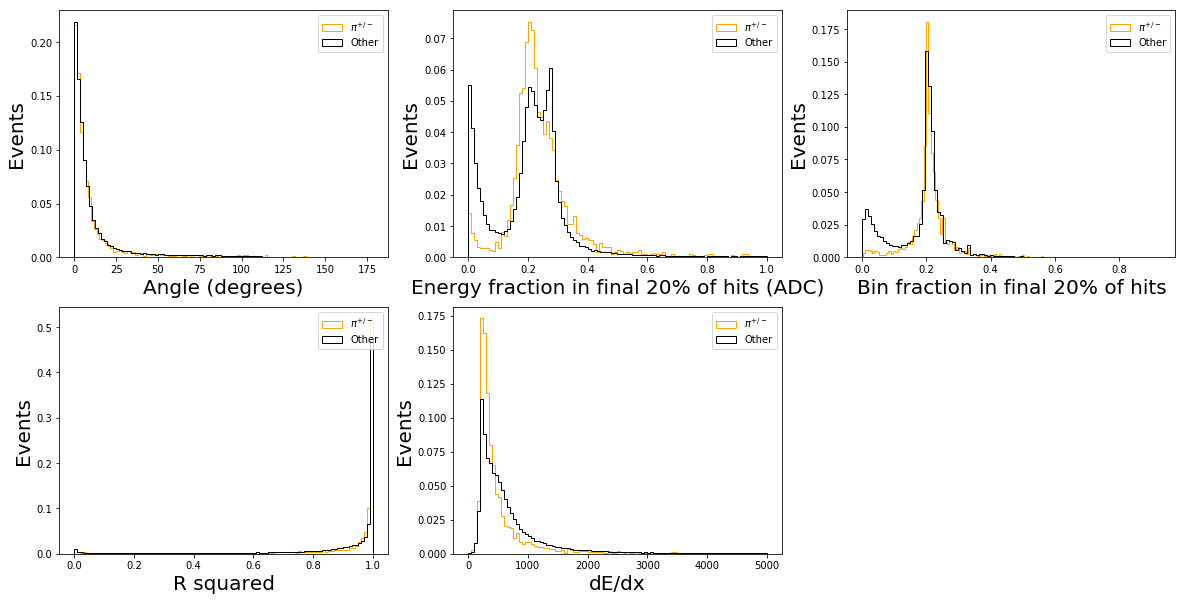

In [137]:
plt.figure(1,figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(pion_angles, 100, weights = weight_pion_angles, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_angles_pions, 100, weights = weight_other_angles_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(pion_energies, 100, weights = weight_pion_energies, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_energies_pions, 100, weights = weight_other_energies_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(pion_binfrac, 100, weights = weight_pion_binfrac, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_binfrac_pions, 100, weights = weight_other_binfrac_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Bin fraction in final 20% of hits', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 4)
plt.hist(pion_rsq, 100, weights = weight_pion_rsq, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_rsq_pions, 100, weights = weight_other_rsq_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('R squared', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(pion_dedx, 100, range = (0, 5000), weights = weight_pion_dedx, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_dedx_pions, 100, range = (0, 5000), weights = weight_other_dedx_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('dE/dx', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.show()

# Muon vs other

In [138]:
muon_angles = np.load('trainangles_muons_t.npy')
other_angles_muons = np.load('trainangles_other_t_muons.npy')
weight_muon_angles = np.ones_like(muon_angles) / len(muon_angles)
weight_other_angles_muons = np.ones_like(other_angles_muons) / len(other_angles_muons)

In [139]:
muon_energies = np.load('trainenergy_muons_t.npy')
other_energies_muons = np.load('trainenergy_other_t_muons.npy')
weight_muon_energies = np.ones_like(muon_energies) / len(muon_energies)
weight_other_energies_muons = np.ones_like(other_energies_muons) / len(other_energies_muons)

In [140]:
muon_binfrac = np.load('trainbinfrac_muons_t.npy')
other_binfrac_muons = np.load('trainbinfrac_other_t_muons.npy')
weight_muon_binfrac = np.ones_like(muon_binfrac) / len(muon_binfrac)
weight_other_binfrac_muons = np.ones_like(other_binfrac_muons) / len(other_binfrac_muons)

In [141]:
muon_rsq = np.load('trainrsq_muons_t.npy')
other_rsq_muons = np.load('trainrsq_other_t_muons.npy')
weight_muon_rsq = np.ones_like(muon_rsq) / len(muon_rsq)
weight_other_rsq_muons = np.ones_like(other_rsq_muons) / len(other_rsq_muons)

In [142]:
muon_dedx = np.load('traindedx_muons_t.npy')
other_dedx_muons = np.load('traindedx_other_t_muons.npy')
weight_muon_dedx = np.ones_like(muon_dedx) / len(muon_dedx)
weight_other_dedx_muons = np.ones_like(other_dedx_muons) / len(other_dedx_muons)

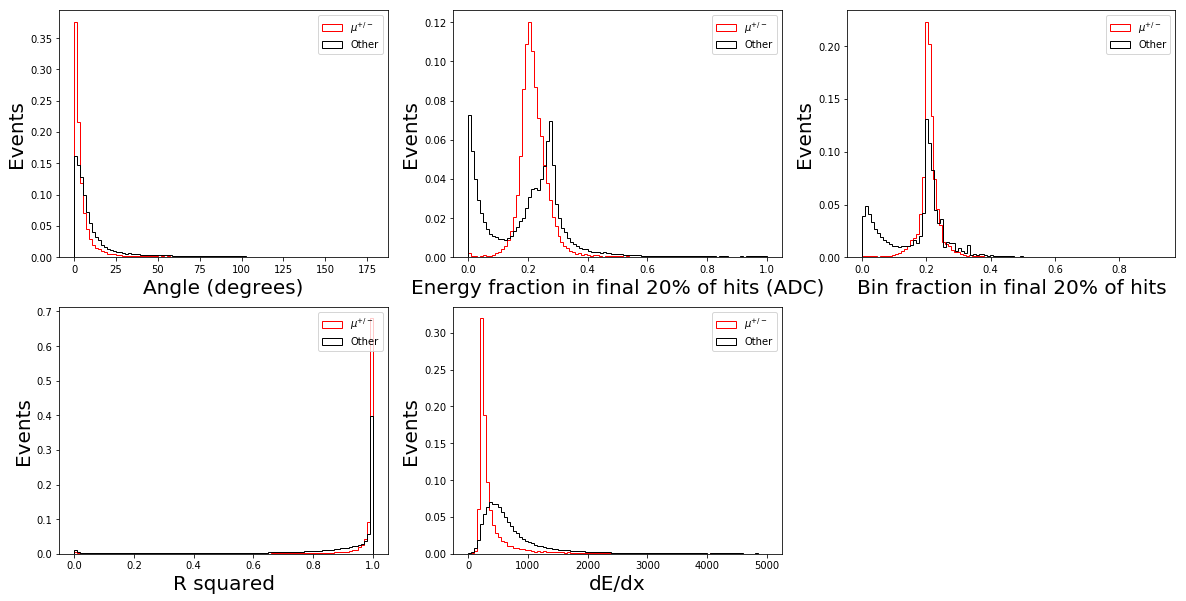

In [143]:
plt.figure(1,figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(muon_angles, 100, weights = weight_muon_angles, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_angles_muons, 100, weights = weight_other_angles_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(muon_energies, 100, weights = weight_muon_energies, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_energies_muons, 100, weights = weight_other_energies_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(muon_binfrac, 100, weights = weight_muon_binfrac, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_binfrac_muons, 100, weights = weight_other_binfrac_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Bin fraction in final 20% of hits', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 4)
plt.hist(muon_rsq, 100, weights = weight_muon_rsq, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_rsq_muons, 100, weights = weight_other_rsq_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('R squared', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(muon_dedx, 100, range = (0, 5000), weights = weight_muon_dedx, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_dedx_muons, 100, range = (0, 5000), weights = weight_other_dedx_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('dE/dx', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.show()

# Proton vs other

In [144]:
proton_angles = np.load('trainangles_protons_t.npy')
other_angles_protons = np.load('trainangles_other_t_protons.npy')
weight_proton_angles = np.ones_like(proton_angles) / len(proton_angles)
weight_other_angles_protons = np.ones_like(other_angles_protons) / len(other_angles_protons)

In [145]:
proton_energies = np.load('trainenergy_protons_t.npy')
other_energies_protons = np.load('trainenergy_other_t_protons.npy')
weight_proton_energies = np.ones_like(proton_energies) / len(proton_energies)
weight_other_energies_protons = np.ones_like(other_energies_protons) / len(other_energies_protons)

In [146]:
proton_binfrac = np.load('trainbinfrac_protons_t.npy')
other_binfrac_protons = np.load('trainbinfrac_other_t_protons.npy')
weight_proton_binfrac = np.ones_like(proton_binfrac) / len(proton_binfrac)
weight_other_binfrac_protons = np.ones_like(other_binfrac_protons) / len(other_binfrac_protons)

In [147]:
proton_rsq = np.load('trainrsq_protons_t.npy')
other_rsq_protons = np.load('trainrsq_other_t_protons.npy')
weight_proton_rsq = np.ones_like(proton_rsq) / len(proton_rsq)
weight_other_rsq_protons = np.ones_like(other_rsq_protons) / len(other_rsq_protons)

In [148]:
proton_dedx = np.load('traindedx_protons_t.npy')
other_dedx_protons = np.load('traindedx_other_t_protons.npy')
weight_proton_dedx = np.ones_like(proton_dedx) / len(proton_dedx)
weight_other_dedx_protons = np.ones_like(other_dedx_protons) / len(other_dedx_protons)

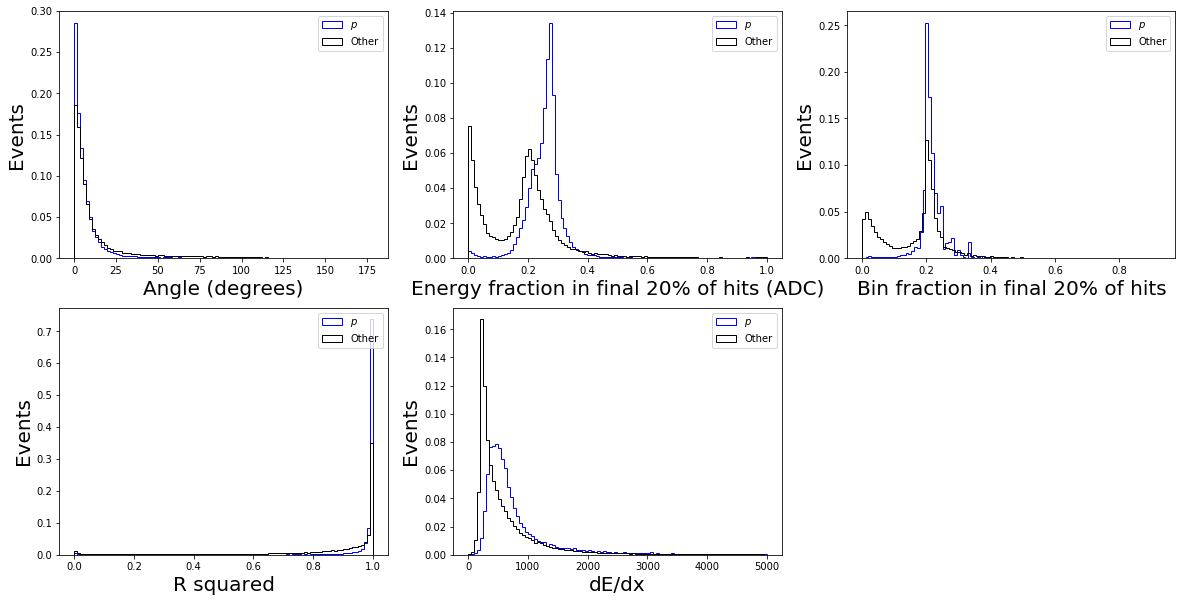

In [149]:
plt.figure(1,figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(proton_angles, 100, weights = weight_proton_angles, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_angles_protons, 100, weights = weight_other_angles_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Angle (degrees)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 2)
plt.hist(proton_energies, 100, weights = weight_proton_energies, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_energies_protons, 100, weights = weight_other_energies_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 3)
plt.hist(proton_binfrac, 100, weights = weight_proton_binfrac, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_binfrac_protons, 100, weights = weight_other_binfrac_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Bin fraction in final 20% of hits', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 4)
plt.hist(proton_rsq, 100, weights = weight_proton_rsq, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_rsq_protons, 100, weights = weight_other_rsq_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('R squared', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(proton_dedx, 100, range = (0, 5000), weights = weight_proton_dedx, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_dedx_protons, 100, range = (0, 5000), weights = weight_other_dedx_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('dE/dx', fontsize=20)
plt.ylabel('Events', fontsize=20)
plt.legend()

plt.show()

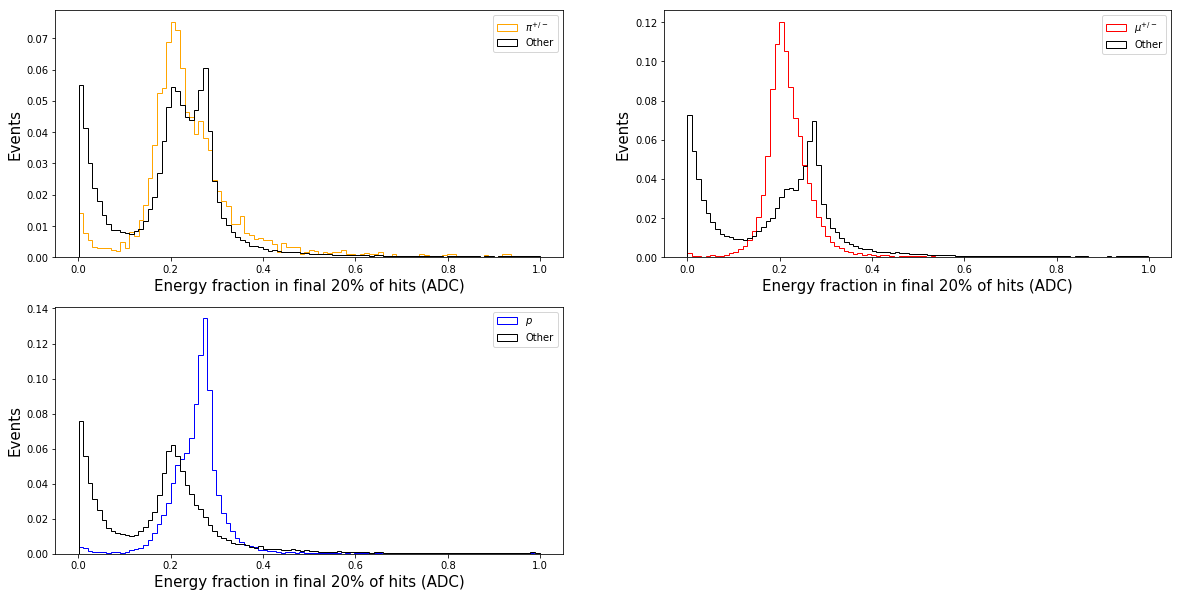

In [150]:
plt.figure(1,figsize=(20,10))

plt.subplot(2, 2, 1)
plt.hist(pion_energies, 100, weights = weight_pion_energies, histtype = u'step', label = r'$\pi^{+/-}$', color = 'orange')
plt.hist(other_energies_pions, 100, weights = weight_other_energies_pions, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(muon_energies, 100, weights = weight_muon_energies, histtype = u'step', label = r'$\mu^{+/-}$', color = 'r')
plt.hist(other_energies_muons, 100, weights = weight_other_energies_muons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(proton_energies, 100, weights = weight_proton_energies, histtype = u'step', label = r'$p$', color = 'b')
plt.hist(other_energies_protons, 100, weights = weight_other_energies_protons, histtype = u'step', label = 'Other', color = 'k')
plt.xlabel('Energy fraction in final 20% of hits (ADC)', fontsize=15)
plt.ylabel('Events', fontsize=15)
plt.legend()

plt.show()

In [75]:
#BDT classes predicted by individual BDTs
muon_pred_train = np.load('muon_pred_train.npy')
pion_pred_train = np.load('pion_pred_train.npy')
proton_pred_train = np.load('proton_pred_train.npy')

In [76]:
muon_pred_test = np.load('muon_pred_test.npy')
pion_pred_test = np.load('pion_pred_test.npy')
proton_pred_test = np.load('proton_pred_test.npy')

In [85]:
preds = np.array(list(zip(muon_pred_train, pion_pred_train, proton_pred_train)))

In [86]:
preds_test = np.array(list(zip(muon_pred_test, pion_pred_test, proton_pred_test)))

In [87]:
#Where the muon BDT predicted a muon
pred_muon_train = np.where(preds == 13)[0]

In [88]:
pred_pion_train = np.where(preds == 211)[0]

In [89]:
pred_proton_train = np.where(preds == 2212)[0]

In [90]:
pred_muon_test = np.where(preds_test == 13)[0]

In [91]:
pred_pion_test = np.where(preds_test == 211)[0]

In [92]:
pred_proton_test = np.where(preds_test == 2212)[0]

In [93]:
#Percentage of PFOs predicted as both muon and pion
(len(np.intersect1d(pred_muon_train, pred_pion_train)) / len(preds)) * 100

0.4949550214395684

In [94]:
(len(np.intersect1d(pred_proton_train, pred_pion_train)) / len(preds)) * 100

0.4529665491837695

In [95]:
(len(np.intersect1d(pred_muon_train, pred_proton_train)) / len(preds)) * 100

3.3578054025167634

In [96]:
(len(set.intersection(set(pred_muon_train), set(pred_pion_train), set(pred_proton_train))) / len(preds)) * 100

0.053439873780107644

In [97]:
(len(np.intersect1d(pred_muon_test, pred_pion_test)) / len(preds)) * 100

0.34608680162355426

In [98]:
(len(np.intersect1d(pred_proton_test, pred_pion_test)) / len(preds)) * 100

0.31809448678635505

In [99]:
(len(np.intersect1d(pred_muon_test, pred_proton_test)) / len(preds)) * 100

2.729250696626926

In [100]:
(len(set.intersection(set(pred_muon_test), set(pred_pion_test), set(pred_proton_test))) / len(preds)) * 100

0.00890664563001794

In [101]:
muon_pion_train = np.intersect1d(pred_muon_train, pred_pion_train)

In [102]:
proton_pion_train = np.intersect1d(pred_proton_train, pred_pion_train)

In [103]:
muon_proton_train = np.intersect1d(pred_muon_train, pred_proton_train)

In [104]:
muon_pion_test = np.intersect1d(pred_muon_test, pred_pion_test)

In [105]:
proton_pion_test = np.intersect1d(pred_proton_test, pred_pion_test)

In [106]:
muon_proton_test = np.intersect1d(pred_muon_test, pred_proton_test)

In [107]:
wirePos_train = np.load('train_wirePos.npy')
driftPos_train = np.load('train_driftPos.npy')

In [108]:
wirePos_train_tracks = wirePos_train[tracks_train]
driftPos_train_tracks = driftPos_train[tracks_train]

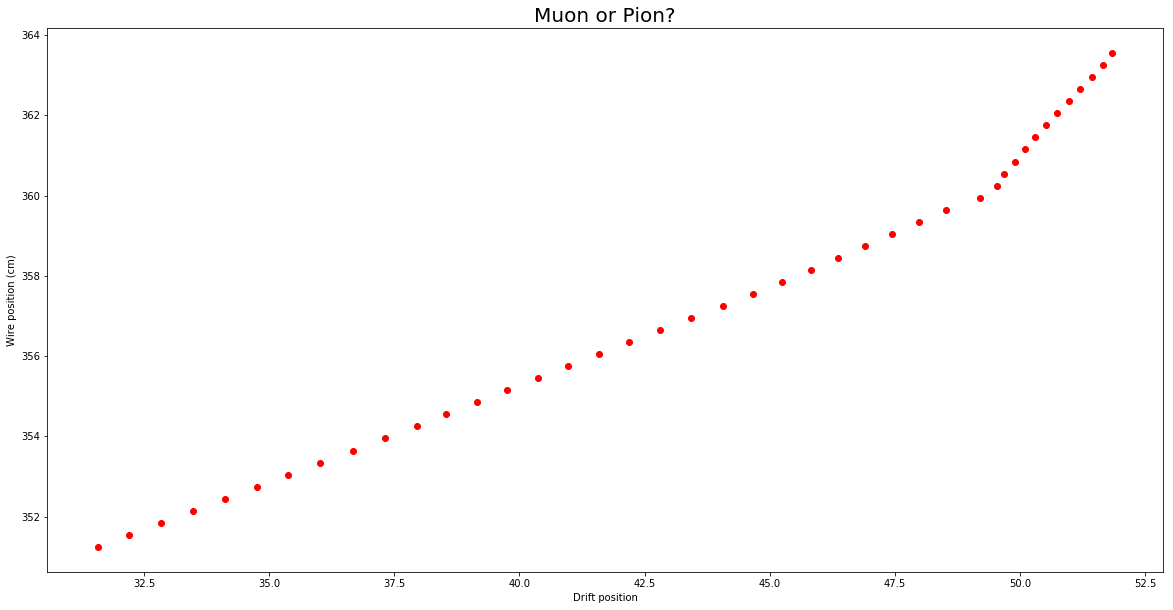

In [109]:
plt.figure(1,figsize=(20,10))
plt.scatter(driftPos_train[27], wirePos_train[27], color = 'r')
plt.title('Muon or Pion?', fontsize = 20)
plt.xlabel('Drift position')
plt.ylabel('Wire position (cm)')
plt.show()

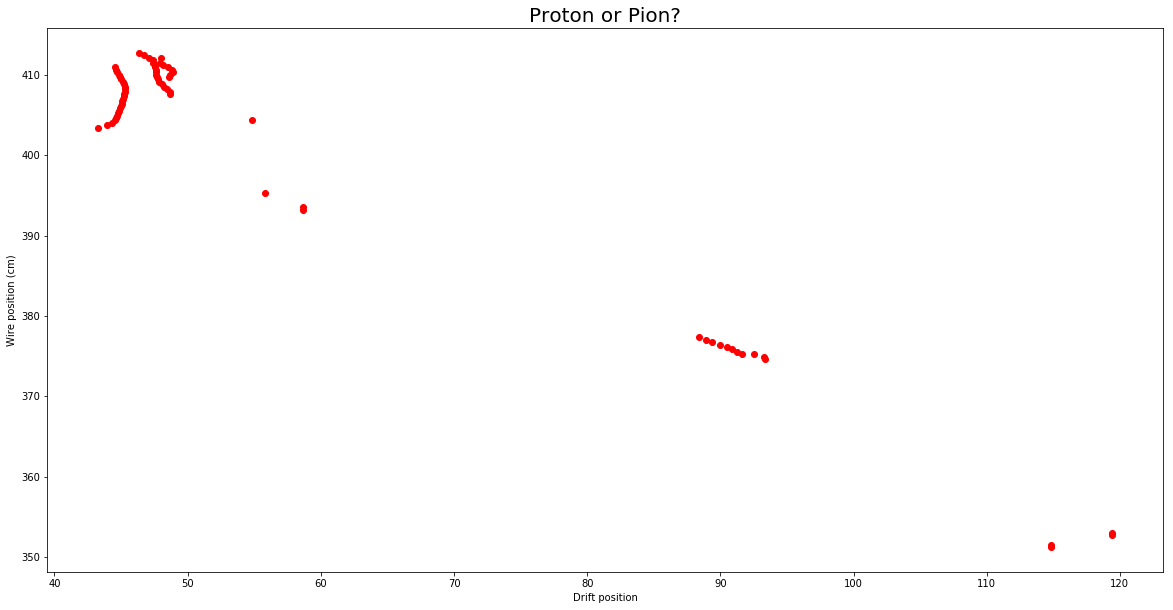

In [110]:
plt.figure(1,figsize=(20,10))
plt.scatter(driftPos_train[16], wirePos_train[16], color = 'r')
plt.title('Proton or Pion?', fontsize = 20)
plt.xlabel('Drift position')
plt.ylabel('Wire position (cm)')
plt.show()

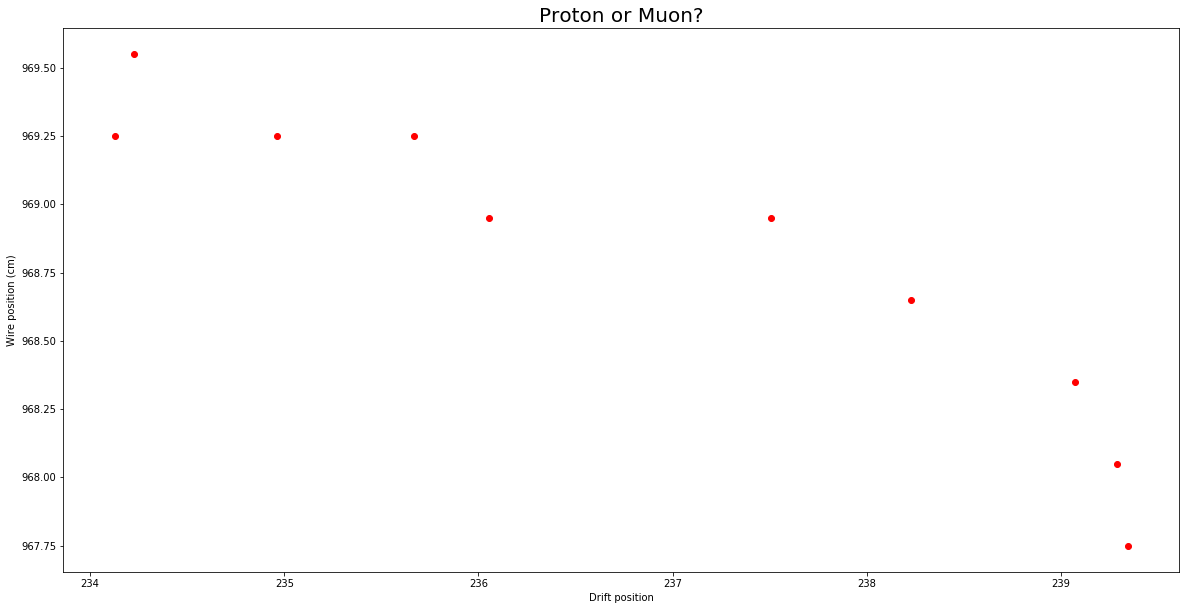

In [111]:
plt.figure(1,figsize=(20,10))
plt.scatter(driftPos_train[74], wirePos_train[74], color = 'r')
plt.title('Proton or Muon?', fontsize = 20)
plt.xlabel('Drift position')
plt.ylabel('Wire position (cm)')
plt.show()

# Muon vs Pion BDT

In [112]:
pdg_muon_pion_train = pdg_train[muon_pion_train]

In [113]:
pdg_muon_pion_test = pdg_test[muon_pion_test]

In [114]:
#Muon BDT and pion BDT classed these PFOs as either muons/pions
#To do a muon vs pion BDT, remove all the non-muons and pions
pdg_muon_pion_train

array([2212, 2212, 2212, 2212,   13, 2212, 2212,   11, 2212,   13, 2212,
         11,   13,   13,   11,   13,   22, 2212, 2212,   22,   22,   13,
        211, 2212,   11,   11, 2212,   22, 2212,   22,   22,   11,   11,
       2212, 2212,   13,   11, 2212,   11,   13,   13, 2212, 2212, 2212,
         11,   11,   13,  211,   11,  211, 2212,   11,   13,   22, 2212,
       2212,   22,   11, 2212, 2212, 2212,   13,   11,   11,   13,   11,
         13,   11,   13,   11,   11,   13,   11,   13,   13, 2212,   13,
         13,   13, 2212,  211,   22,   11,   11, 2212, 2212,   11,   11,
         11, 2212,   13,   11,   22,  211,  211,   13, 2212,   13,   11,
         11, 2212,   22, 2212,   22,   13,   11, 2212,   22,   11, 2212,
         13,   11,   11,   11,   13,   11, 2212,   11,   13, 2212, 2212,
         22,   13,   11,   13,   11,   11,   13,   13,   13,   13,   13,
         11,   11,   11,   13, 2212,   13, 2212,   11,   13, 2212,   22,
         22,   13,   13,   13,   11, 2212,   22,   

In [115]:
len(pdg_muon_pion_train)

389

In [116]:
set(pdg_muon_pion_train)

{11, 13, 22, 211, 2212}

In [117]:
set(pdg_muon_pion_test)

{11, 13, 22, 211, 321, 2112, 2212}

In [118]:
len(pdg_muon_pion_test)

272

In [119]:
for n, i in enumerate(pdg_muon_pion_train):
    if i == 11:
        pdg_muon_pion_train[n] = 0
    elif i == 22:
        pdg_muon_pion_train[n] = 0
    elif i == 22: 
        pdg_muon_pion_train[n] = 0
    elif i == 2212: 
        pdg_muon_pion_train[n] = 0

In [120]:
for n, i in enumerate(pdg_muon_pion_test):
    if i == 11:
        pdg_muon_pion_test[n] = 0
    elif i == 22:
        pdg_muon_pion_test[n] = 0
    elif i == 321: 
        pdg_muon_pion_test[n] = 0
    elif i == 2212: 
        pdg_muon_pion_test[n] = 0
    elif i == 2112: 
        pdg_muon_pion_test[n] = 0

In [121]:
set(pdg_muon_pion_train)

{0, 13, 211}

In [122]:
set(pdg_muon_pion_test)

{0, 13, 211}

In [123]:
trainangles_mupi = trainangles_tracks[muon_pion_train]
trainenergy_mupi = trainenergy_tracks[muon_pion_train]
trainbinfrac_mupi = trainbinfrac_tracks[muon_pion_train]
trainrsq_mupi = trainrsq_tracks[muon_pion_train]

In [124]:
np.save('trainangles_mupi.npy', trainangles_mupi)
np.save('trainenergy_mupi.npy', trainenergy_mupi)
np.save('trainbinfrac_mupi.npy', trainbinfrac_mupi)
np.save('trainrsq_mupi.npy', trainrsq_mupi)

In [125]:
testangles_mupi = testangles_tracks[muon_pion_test]
testenergy_mupi = testenergy_tracks[muon_pion_test]
testbinfrac_mupi = testbinfrac_tracks[muon_pion_test]
testrsq_mupi = testrsq_tracks[muon_pion_test]

In [126]:
np.save('testangles_mupi.npy', testangles_mupi)
np.save('testenergy_mupi.npy', testenergy_mupi)
np.save('testbinfrac_mupi.npy', testbinfrac_mupi)
np.save('testrsq_mupi.npy', testrsq_mupi)

In [127]:
np.save('pdg_muon_pion_train', pdg_muon_pion_train)
np.save('pdg_muon_pion_test', pdg_muon_pion_test)

# Muon vs Proton BDT

In [128]:
pdg_muon_proton_train = pdg_train[muon_proton_train]

In [129]:
pdg_muon_proton_test = pdg_test[muon_proton_test]

In [130]:
pdg_muon_proton_train[:100]

array([2212,   13, 2212,   13,   11, 2112,   22,   13, 2212,   13,   22,
         13,   13,   13,   11, 2212, 2212,   13,   22, 2212, 2212,   11,
       2212, 2212,   11, 2212,   13, 2212,   11,   13,   11,   11,   11,
        211, 2212, 2212, 2212,   13,   13,   13, 2212,   22, 2212, 2212,
         11, 2212,   11,   11,   11, 2212, 2212, 2212,   11,   13,  211,
         13,   13, 2212, 2212,   11,   11,   11,   13,  211,   22, 2212,
         13,   11,   22,   13, 2212, 2212,   11,   22,   22,   11, 2212,
       2212, 2212, 2212, 2212, 2212, 2212,   22,   13, 2212,  211, 2212,
         13,   13,   11,   13,   13,   13,   11,  211,  211,   11, 2212,
         13])

In [131]:
set(pdg_muon_proton_train)

{11, 13, 22, 211, 321, 2112, 2212}

In [132]:
set(pdg_muon_proton_test)

{11, 13, 22, 211, 321, 2112, 2212}

In [133]:
len(pdg_muon_proton_test)

2145

In [134]:
for n, i in enumerate(pdg_muon_proton_train):
    if i == 11:
        pdg_muon_proton_train[n] = 0
    elif i == 22:
        pdg_muon_proton_train[n] = 0
    elif i == 22: 
        pdg_muon_proton_train[n] = 0
    elif i == 211: 
        pdg_muon_proton_train[n] = 0
    elif i == 321: 
        pdg_muon_proton_train[n] = 0
    elif i == 2112: 
        pdg_muon_proton_train[n] = 0

In [135]:
for n, i in enumerate(pdg_muon_proton_test):
    if i == 11:
        pdg_muon_proton_test[n] = 0
    elif i == 22:
        pdg_muon_proton_test[n] = 0
    elif i == 22: 
        pdg_muon_proton_test[n] = 0
    elif i == 211: 
        pdg_muon_proton_test[n] = 0
    elif i == 321: 
        pdg_muon_proton_test[n] = 0
    elif i == 2112: 
        pdg_muon_proton_test[n] = 0

In [136]:
set(pdg_muon_proton_train)

{0, 13, 2212}

In [137]:
set(pdg_muon_proton_test)

{0, 13, 2212}

In [138]:
trainangles_muprot = trainangles_tracks[muon_proton_train]
trainenergy_muprot = trainenergy_tracks[muon_proton_train]
trainbinfrac_muprot = trainbinfrac_tracks[muon_proton_train]
trainrsq_muprot = trainrsq_tracks[muon_proton_train]

IndexError: index 78542 is out of bounds for axis 0 with size 78513

In [139]:
np.save('trainangles_muprot.npy', trainangles_muprot)
np.save('trainenergy_muprot.npy', trainenergy_muprot)
np.save('trainbinfrac_muprot.npy', trainbinfrac_muprot)
np.save('trainrsq_muprot.npy', trainrsq_muprot)

NameError: name 'trainangles_muprot' is not defined

In [140]:
testangles_muprot = testangles_tracks[muon_proton_test]
testenergy_muprot = testenergy_tracks[muon_proton_test]
testbinfrac_muprot = testbinfrac_tracks[muon_proton_test]
testrsq_muprot = testrsq_tracks[muon_proton_test]

IndexError: index 79141 is out of bounds for axis 0 with size 79124

In [141]:
np.save('testangles_muprot.npy', testangles_muprot)
np.save('testenergy_muprot.npy', testenergy_muprot)
np.save('testbinfrac_muprot.npy', testbinfrac_muprot)
np.save('testrsq_muprot.npy', testrsq_muprot)

NameError: name 'testangles_muprot' is not defined

In [140]:
np.save('pdg_muon_proton_train', pdg_muon_proton_train)
np.save('pdg_muon_proton_test', pdg_muon_proton_test)

In [142]:
len(tracks_train)

78593